##### We are going to analyze netflix data set. Netflix data we will try to find out hidden insights in dataset

In [2]:
# <!-- Let's import all necessary python modules for analyzing data -->
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Now read data
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
netflix_df.shape
# so, we have 8807 rows 
# and 12 column  

(8807, 12)

In [16]:
netflix_df.index

RangeIndex(start=0, stop=8807, step=1)

In [17]:
# Here we are the lists of columns 
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [18]:
# we are going to drop unwanted columns (show_id , description) which no need for analyze 
netflix_df.drop(['show_id' , 'description'] , inplace=True , axis=1)

In [19]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [20]:
# let's take an informative knowledge about dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [21]:
# # let's check a missing value or nan values in our column 
netflix_df.isnull().sum()
# that's, mean we have null values in a dataset

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [22]:
# Let's try to remove the null or filling with another values that will easy to analyze the data 
# In the director column having 2634 null values 
netflix_df['director'].isna().sum()

np.int64(2634)

In [23]:
# my approching is to fill the null values with the most reapeated director name 
direct_name = netflix_df['director'].mode()[0]


In [24]:
# filling null values 
netflix_df['director'] = netflix_df['director'].fillna(direct_name)

In [25]:
# let's check in our director having any null values or not after filling
netflix_df['director'].isna().sum()

np.int64(0)

In [26]:
netflix_df.isna().sum()

type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

In [141]:
netflix_df.columns

Index(['type', 'title', 'director', 'country', 'release_year', 'rating',
       'duration', 'month', 'year', 'date', 'lists_show', 'lead_cast'],
      dtype='object')

In [142]:
#  cast :- Let's fill the null values in cast column
netflix_df['lead_cast'].isna().sum()

np.int64(0)

In [28]:
netflix_df['cast'].value_counts()

cast
David Attenborough                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                        14
Samuel West                                                                                                                                                    10
Jeff Dunham                                                                                                                                                     7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                          6
                                                                                                                                                               ..
Ali Suliman, Saleh Bakr

In [143]:
cast_mode  = netflix_df['lead_cast'].mode()[0]
# filling null values with reapeated values
netflix_df['lead_cast'] = netflix_df['lead_cast'].fillna("Not Mentioned")

C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\767027108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['lead_cast'] = netflix_df['lead_cast'].fillna("Not Mentioned")


In [145]:
netflix_df['lead_cast'].isna().sum()

np.int64(0)

In [146]:
netflix_df.isna().sum()

type            0
title           0
director        0
country         0
release_year    0
rating          0
duration        0
month           0
year            0
date            0
lists_show      0
lead_cast       0
dtype: int64

In [32]:
# Let's try to fill country column null values in data set 
netflix_df['country'].isna().sum()

np.int64(831)

In [33]:
netflix_df['country'].value_counts().head()

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64

In [34]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

In [35]:
netflix_df['country'].isna().sum()

np.int64(0)

In [36]:
netflix_df.isna().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
dtype: int64

In [37]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [38]:
netflix_df['date_added'].value_counts().head()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
Name: count, dtype: int64

In [39]:
netflix_df['date_added'] = netflix_df['date_added'].fillna(netflix_df['date_added'].mode()[0])

In [40]:
netflix_df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
dtype: int64

In [41]:
netflix_df['rating'].value_counts().head()

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

In [42]:
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

In [43]:
netflix_df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
dtype: int64

In [44]:
netflix_df['duration'].value_counts().head()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
Name: count, dtype: int64

In [45]:
netflix_df['duration'] = netflix_df['duration'].fillna(netflix_df['duration'].mode()[0])

In [46]:
netflix_df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [47]:
# So We have filled all columns that containing null values with most frequent repeated values 

In [48]:
# let's remove unwanted values in rating column whin ic written in min form 
netflix_df['rating'].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [49]:
netflix_df = netflix_df[~netflix_df['rating'].str.contains('min')]

In [50]:
netflix_df['rating'].count()

np.int64(8804)

In [51]:
netflix_df.shape

(8804, 10)

In [52]:
# we wil convert object dtype to date where we can extract date like yeat , month and day 
netflix_df['date_added'] = netflix_df['date_added'].str.replace("," , "")

C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\1004113456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['date_added'] = netflix_df['date_added'].str.replace("," , "")


In [53]:
# See we have remove the commas(,) reason is that to remove comma is we can't convert the object datatype into datetime so we have to remove that
netflix_df['date_added'] =  pd.to_datetime(netflix_df['date_added'] , format = "mixed")

C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\4047095752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['date_added'] =  pd.to_datetime(netflix_df['date_added'] , format = "mixed")


In [54]:
netflix_df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8804, dtype: datetime64[ns]

In [55]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8804 non-null   object        
 1   title         8804 non-null   object        
 2   director      8804 non-null   object        
 3   cast          8804 non-null   object        
 4   country       8804 non-null   object        
 5   date_added    8804 non-null   datetime64[ns]
 6   release_year  8804 non-null   int64         
 7   rating        8804 non-null   object        
 8   duration      8804 non-null   object        
 9   listed_in     8804 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 756.6+ KB


In [56]:
# let's extract the month and year in date_added column 
import datetime as dt
netflix_df['month'] = netflix_df['date_added'].dt.month_name()
netflix_df['year'] = netflix_df['date_added'].dt.year
netflix_df['date'] = netflix_df['date_added'].dt.day


C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\4029847605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['month'] = netflix_df['date_added'].dt.month_name()
C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\4029847605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['year'] = netflix_df['date_added'].dt.year
C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\4029847605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [57]:
netflix_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,year,date
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,25
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,24
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,24
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021,24
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",November,2019,20
8803,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",July,2019,1
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",November,2019,1
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",January,2020,11


In [58]:
netflix_df['lists_show'] =netflix_df['listed_in'].str.split(",").str[0]

C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\457165384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['lists_show'] =netflix_df['listed_in'].str.split(",").str[0]


In [59]:
netflix_df['lists_show'].value_counts()

lists_show
Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           774
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         388
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 253
Docuseries                       221
Anime Series                     176
International Movies             128
TV Comedies                      120
Reality TV                       120
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            54
TV Action & Adventure             40
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Classic & Cult TV                 22
Anime Features                    21
Independent Movies                20
Music & Musicals           

In [60]:
netflix_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,year,date,lists_show
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,25,Documentaries
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,24,International TV Shows
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,24,Crime TV Shows
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021,24,Docuseries
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021,24,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",November,2019,20,Cult Movies
8803,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",July,2019,1,Kids' TV
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",November,2019,1,Comedies
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",January,2020,11,Children & Family Movies


In [61]:
netflix_df['lead_cast'] = netflix_df['cast'].str.split(",").str[0]

C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\4105658999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['lead_cast'] = netflix_df['cast'].str.split(",").str[0]


In [62]:
netflix_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,year,date,lists_show,lead_cast
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,25,Documentaries,David Attenborough
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021,24,International TV Shows,Ama Qamata
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,24,Crime TV Shows,Sami Bouajila
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021,24,Docuseries,David Attenborough
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021,24,International TV Shows,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",November,2019,20,Cult Movies,Mark Ruffalo
8803,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",July,2019,1,Kids' TV,David Attenborough
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",November,2019,1,Comedies,Jesse Eisenberg
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",January,2020,11,Children & Family Movies,Tim Allen


In [63]:
# dropping unwanted column after extracting data from data set into new columns
netflix_df.drop(['date_added' ,'listed_in' , 'cast'],axis=1 , inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\1411462721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df.drop(['date_added' ,'listed_in' , 'cast'],axis=1 , inplace=True)


In [64]:
netflix_df

,type,title,director,country,release_year,rating,duration,month,year,date,lists_show,lead_cast
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,September,2021,25,Documentaries,David Attenborough
1,TV Show,Blood & Water,Rajiv Chilaka,South Africa,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Ama Qamata
2,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,September,2021,24,Crime TV Shows,Sami Bouajila
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,United States,2021,TV-MA,1 Season,September,2021,24,Docuseries,David Attenborough
4,TV Show,Kota Factory,Rajiv Chilaka,India,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,United States,2007,R,158 min,November,2019,20,Cult Movies,Mark Ruffalo
8803,TV Show,Zombie Dumb,Rajiv Chilaka,United States,2018,TV-Y7,2 Seasons,July,2019,1,Kids' TV,David Attenborough
8804,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min,November,2019,1,Comedies,Jesse Eisenberg
8805,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min,January,2020,11,Children & Family Movies,Tim Allen


In [65]:
# let's extract the insight in given clean data 
movies = netflix_df[netflix_df['type'] == 'Movie']

In [66]:
movies

,type,title,director,country,release_year,rating,duration,month,year,date,lists_show,lead_cast
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,September,2021,25,Documentaries,David Attenborough
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021,PG,91 min,September,2021,24,Children & Family Movies,Vanessa Hudgens
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,September,2021,24,Dramas,Kofi Ghanaba
9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,September,2021,24,Comedies,Melissa McCarthy
12,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min,September,2021,23,Dramas,Luna Wedler
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,96 min,March,2016,9,Dramas,Ali Suliman
8802,Movie,Zodiac,David Fincher,United States,2007,R,158 min,November,2019,20,Cult Movies,Mark Ruffalo
8804,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min,November,2019,1,Comedies,Jesse Eisenberg
8805,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min,January,2020,11,Children & Family Movies,Tim Allen


In [67]:
TV_series = netflix_df[netflix_df['type'] == 'TV Show']

In [68]:
TV_series

,type,title,director,country,release_year,rating,duration,month,year,date,lists_show,lead_cast
1,TV Show,Blood & Water,Rajiv Chilaka,South Africa,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Ama Qamata
2,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,September,2021,24,Crime TV Shows,Sami Bouajila
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,United States,2021,TV-MA,1 Season,September,2021,24,Docuseries,David Attenborough
4,TV Show,Kota Factory,Rajiv Chilaka,India,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Mayur More
5,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,September,2021,24,TV Dramas,Kate Siegel
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,Rajiv Chilaka,"Japan, Canada",2015,TV-Y7,2 Seasons,May,2018,1,Anime Series,Mike Liscio
8796,TV Show,Yunus Emre,Rajiv Chilaka,Turkey,2016,TV-PG,2 Seasons,January,2017,17,International TV Shows,Gökhan Atalay
8797,TV Show,Zak Storm,Rajiv Chilaka,"United States, France, South Korea, Indonesia",2016,TV-Y7,3 Seasons,September,2018,13,Kids' TV,Michael Johnston
8800,TV Show,Zindagi Gulzar Hai,Rajiv Chilaka,Pakistan,2012,TV-PG,1 Season,December,2016,15,International TV Shows,Sanam Saeed


#### Insights

In [69]:
counts = netflix_df['type'].value_counts()

<!-- Netflix has more number of movies than TV Show  -->

[Text(0, 0, '6128'), Text(0, 0, '2676')]

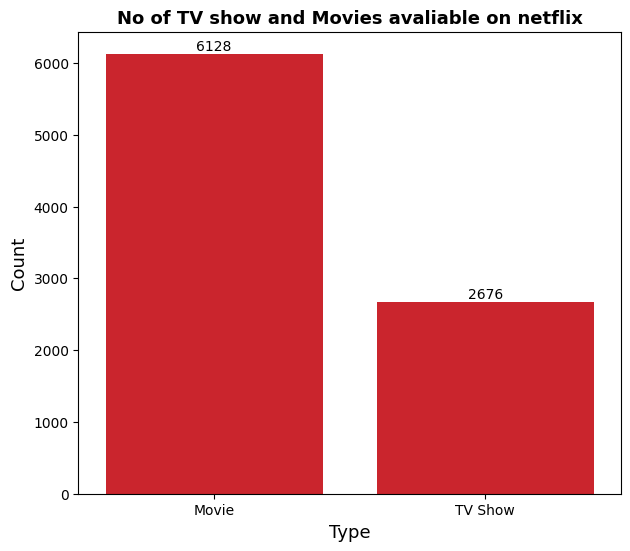

In [70]:
plt.figure(figsize=(7,6))
ax = sns.countplot(data=netflix_df , x = 'type' ,color = "#E50914" ,order=netflix_df['type'].value_counts().index)
plt.title("No of TV show and Movies avaliable on netflix" , fontdict={"color":"black" , "fontweight": "bold" , "size" : 13})
plt.xlabel("Type" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Count" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
ax.bar_label(container=ax.containers[0])

In [71]:
netflix_df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

[Text(0, 0, '3211'),
 Text(0, 0, '2160'),
 Text(0, 0, '863'),
 Text(0, 0, '799'),
 Text(0, 0, '490'),
 Text(0, 0, '334'),
 Text(0, 0, '307'),
 Text(0, 0, '287'),
 Text(0, 0, '220'),
 Text(0, 0, '80'),
 Text(0, 0, '41'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '3')]

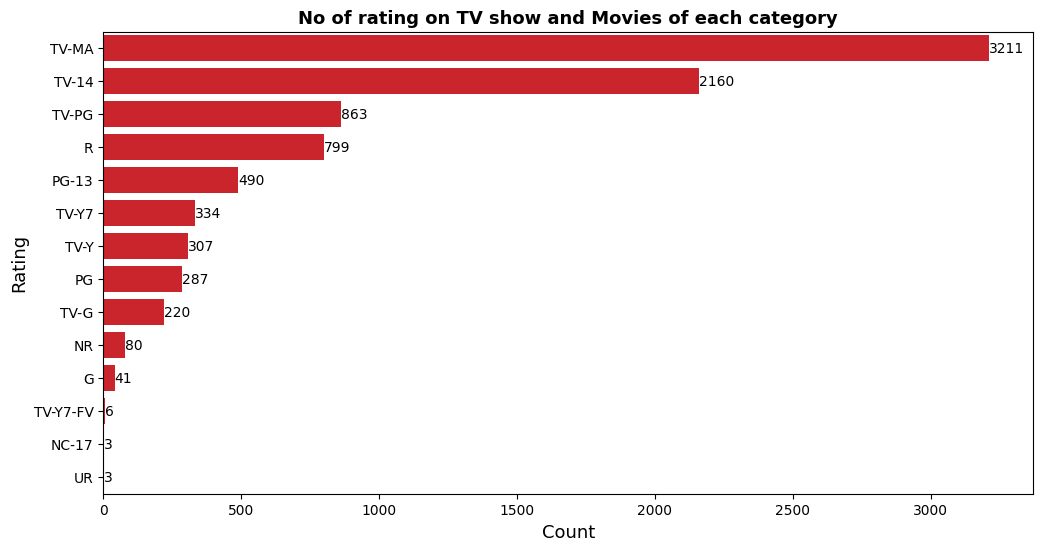

In [72]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=netflix_df , y ='rating' , color="#E50914" , order=netflix_df['rating'].value_counts().index , width=0.8)
plt.title("No of rating on TV show and Movies of each category" , fontdict={"color":"black" , "fontweight": "bold" , "size" : 13})
plt.xlabel("Count" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Rating" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
ax.bar_label(container=ax.containers[0])

##### Rating Insights
     - As we can graph no of rating is gatthered by TV-M4
     - After that TV-M4, TV-14 secured second position
     - least rating is got by UR

In [73]:
netflix_df['year'].value_counts()

year
2019    2016
2020    1889
2018    1649
2021    1498
2017    1187
2016     427
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

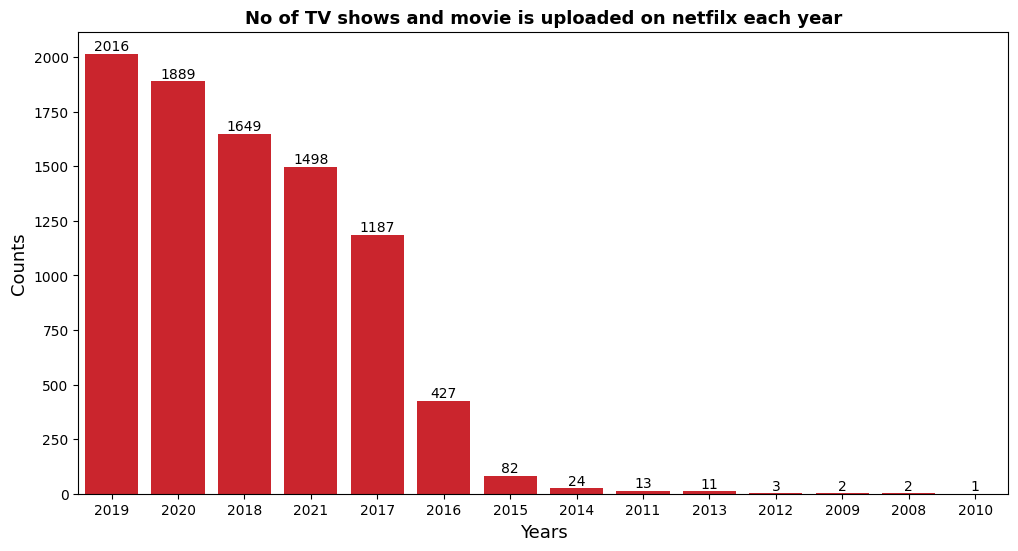

In [74]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=netflix_df , x ='year' , color="#E50914" , order=netflix_df['year'].value_counts().index , width=0.8)
plt.title("No of TV shows and movie is uploaded on netfilx each year" , fontdict={"color":"black" , "fontweight": "bold" , "size" : 13})
plt.xlabel("Years" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Counts" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
p = ax.bar_label(container=ax.containers[0])

##### 3--> Insights
    - 2019 was only year that was uploaded most movies or TV shows on netflix
    - 2010 was only year that was fewer number of movies and series uploaded

In [75]:
netflix_df['month'].value_counts()

month
July         827
December     813
September    769
April        763
October      760
August       754
January      748
March        742
June         728
November     705
May          632
February     563
Name: count, dtype: int64

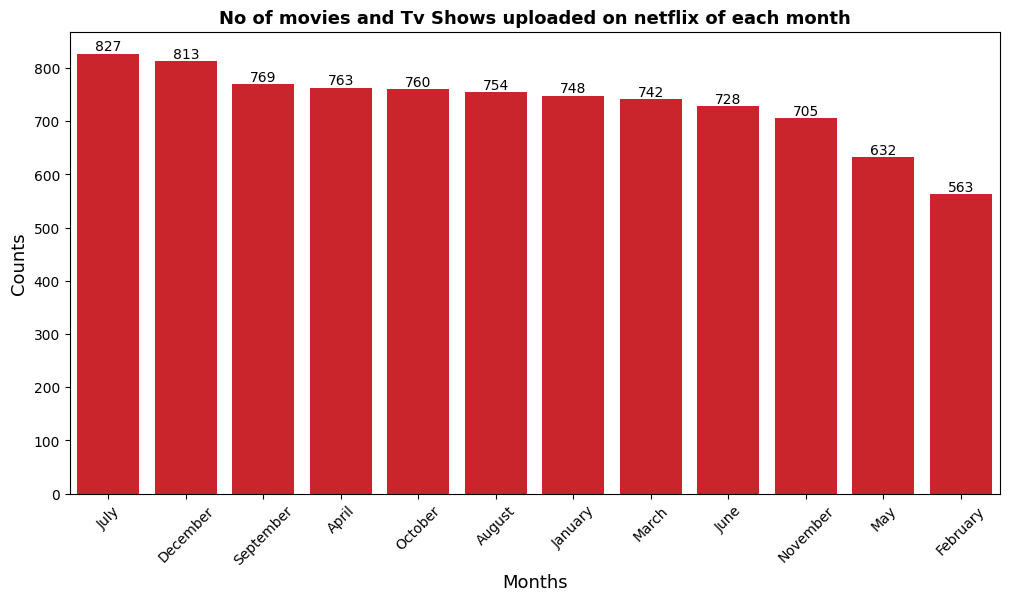

In [258]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=netflix_df , x ='month' , color="#E50914" , order=netflix_df['month'].value_counts().index , width=0.8)
plt.title("No of movies and Tv Shows uploaded on netflix of each month" , fontdict={"color":"black" , "fontweight": "bold" , "size" : 13})
plt.xlabel("Months" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Counts" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 45)
p = ax.bar_label(container=ax.containers[0])

#### Insights
    • In July and December month, most number of shows are uploaded on Netflix.
    • Least shows are uploaded in February month.

In [77]:
netflix_df['date'].value_counts()

date
1     2222
15     686
2      325
16     288
31     274
20     249
19     243
5      231
22     230
10     214
6      210
30     210
18     207
26     206
8      201
14     198
25     197
27     195
7      194
21     193
28     190
23     184
12     181
17     180
13     175
4      174
24     159
3      151
11     149
9      147
29     141
Name: count, dtype: int64

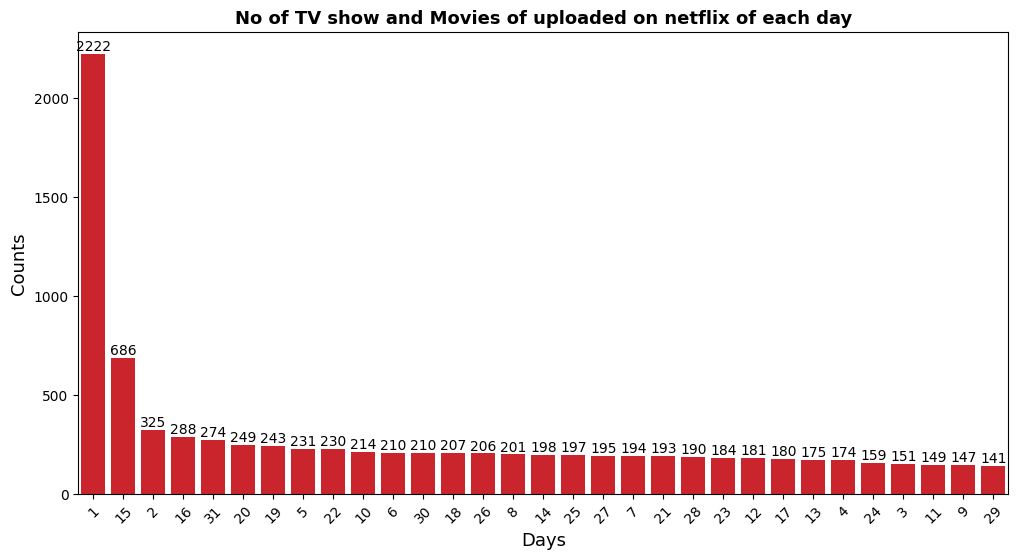

In [259]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=netflix_df , x ='date' , color="#E50914" , order=netflix_df['date'].value_counts().index , width=0.8)
plt.title("No of TV show and Movies of uploaded on netflix of each day" , fontdict={"color":"black" , "fontweight": "bold" , "size" : 13})
plt.xlabel("Days" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Counts" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 45)
p =ax.bar_label(container=ax.containers[0])

##### Insight
    - In starting and mid og month , most number of movies and shows uploaded
    - In ending of the month least shows are uploaded

In [79]:
country_data = netflix_df['country'].value_counts().head(15)
country_data

country
United States     3646
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: count, dtype: int64

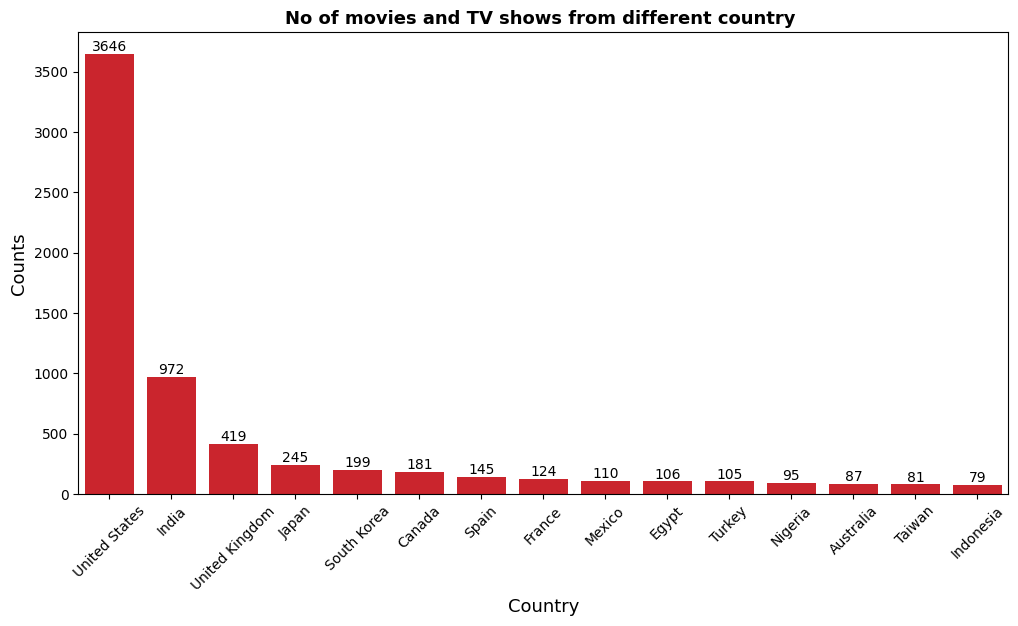

In [255]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = country_data.index , y = country_data.values , color= "#E50914",  width=0.8)
plt.title("No of movies and TV shows from different country " , fontdict={"color":"black" , "fontweight": "bold" , "size" : 13})
plt.xlabel("Country" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Counts" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 45)
p =ax.bar_label(container=ax.containers[0])

##### Insights:
    - United state country has most number of show 
    - India is second one that have most number of shows
    - Indonesia only one that have least number of shows avaliable netflix

In [81]:
netflix_df

,type,title,director,country,release_year,rating,duration,month,year,date,lists_show,lead_cast
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,September,2021,25,Documentaries,David Attenborough
1,TV Show,Blood & Water,Rajiv Chilaka,South Africa,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Ama Qamata
2,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,September,2021,24,Crime TV Shows,Sami Bouajila
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,United States,2021,TV-MA,1 Season,September,2021,24,Docuseries,David Attenborough
4,TV Show,Kota Factory,Rajiv Chilaka,India,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,United States,2007,R,158 min,November,2019,20,Cult Movies,Mark Ruffalo
8803,TV Show,Zombie Dumb,Rajiv Chilaka,United States,2018,TV-Y7,2 Seasons,July,2019,1,Kids' TV,David Attenborough
8804,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min,November,2019,1,Comedies,Jesse Eisenberg
8805,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min,January,2020,11,Children & Family Movies,Tim Allen


In [82]:
movies['lists_show'].value_counts()

lists_show
Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
Children & Family Movies     605
Stand-Up Comedy              334
Horror Movies                275
International Movies         128
Classic Movies                80
Thrillers                     65
Movies                        54
Anime Features                21
Independent Movies            20
Music & Musicals              18
Sci-Fi & Fantasy              13
Cult Movies                   12
Romantic Movies                3
LGBTQ Movies                   1
Sports Movies                  1
Name: count, dtype: int64

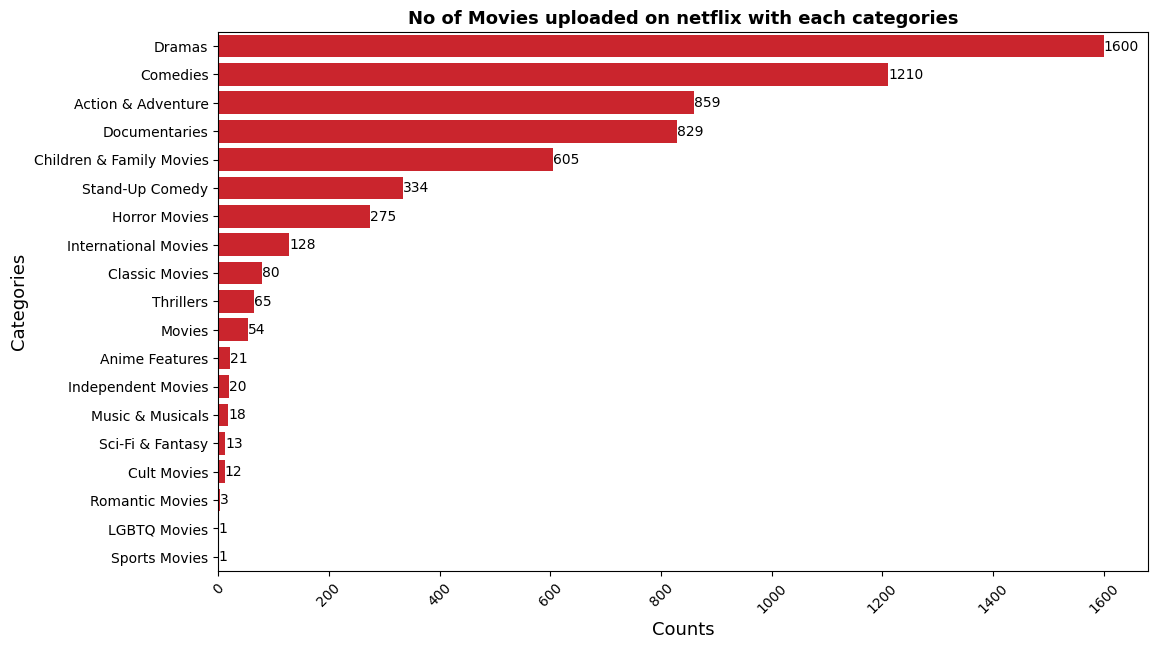

In [83]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data=movies , y ='lists_show' , color="#E50914" , order=movies['lists_show'].value_counts().index , width=0.8)
plt.title("No of Movies uploaded on netflix with each categories" , fontdict={"color":"black" , "fontweight": "bold" , "size" : 13})
plt.xlabel("Counts" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Categories" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 45)
p =ax.bar_label(container=ax.containers[0])

#### Insights
    • Most number of Movies are uploaded under Drama Category.
    • Comedy Category has the second largest collection of Movies available on Netflix.

In [84]:
TV_series

,type,title,director,country,release_year,rating,duration,month,year,date,lists_show,lead_cast
1,TV Show,Blood & Water,Rajiv Chilaka,South Africa,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Ama Qamata
2,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,September,2021,24,Crime TV Shows,Sami Bouajila
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,United States,2021,TV-MA,1 Season,September,2021,24,Docuseries,David Attenborough
4,TV Show,Kota Factory,Rajiv Chilaka,India,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Mayur More
5,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,September,2021,24,TV Dramas,Kate Siegel
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,Rajiv Chilaka,"Japan, Canada",2015,TV-Y7,2 Seasons,May,2018,1,Anime Series,Mike Liscio
8796,TV Show,Yunus Emre,Rajiv Chilaka,Turkey,2016,TV-PG,2 Seasons,January,2017,17,International TV Shows,Gökhan Atalay
8797,TV Show,Zak Storm,Rajiv Chilaka,"United States, France, South Korea, Indonesia",2016,TV-Y7,3 Seasons,September,2018,13,Kids' TV,Michael Johnston
8800,TV Show,Zindagi Gulzar Hai,Rajiv Chilaka,Pakistan,2012,TV-PG,1 Season,December,2016,15,International TV Shows,Sanam Saeed


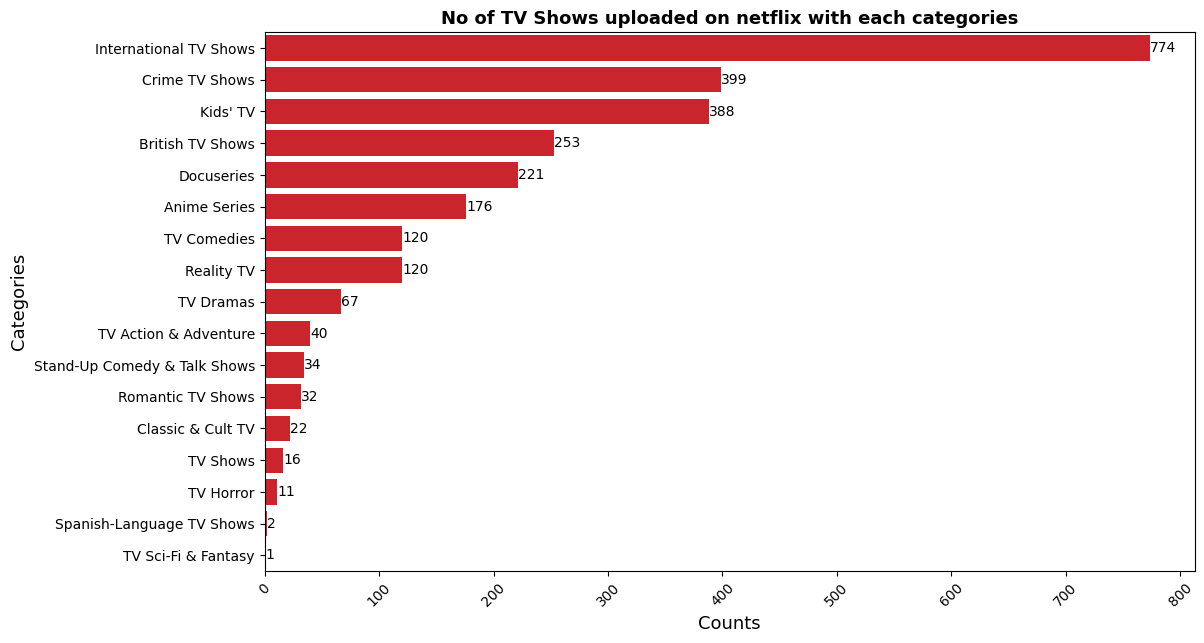

In [85]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data=TV_series , y ='lists_show' , color="#E50914" , order=TV_series['lists_show'].value_counts().index , width=0.8)
plt.title("No of TV Shows uploaded on netflix with each categories" , fontdict={"color":"black" , "fontweight": "bold" , "size" : 13})
plt.xlabel("Counts" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Categories" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 45)
p =ax.bar_label(container=ax.containers[0])

##### Insights
    - Internation TV show has highest demend 
    - Tv Sci -FI & Fantasy has less demand 

In [98]:
TV_series

,type,title,director,country,release_year,rating,duration,month,year,date,lists_show,lead_cast
1,TV Show,Blood & Water,Rajiv Chilaka,South Africa,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Ama Qamata
2,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,September,2021,24,Crime TV Shows,Sami Bouajila
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,United States,2021,TV-MA,1 Season,September,2021,24,Docuseries,David Attenborough
4,TV Show,Kota Factory,Rajiv Chilaka,India,2021,TV-MA,2 Seasons,September,2021,24,International TV Shows,Mayur More
5,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,September,2021,24,TV Dramas,Kate Siegel
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,Rajiv Chilaka,"Japan, Canada",2015,TV-Y7,2 Seasons,May,2018,1,Anime Series,Mike Liscio
8796,TV Show,Yunus Emre,Rajiv Chilaka,Turkey,2016,TV-PG,2 Seasons,January,2017,17,International TV Shows,Gökhan Atalay
8797,TV Show,Zak Storm,Rajiv Chilaka,"United States, France, South Korea, Indonesia",2016,TV-Y7,3 Seasons,September,2018,13,Kids' TV,Michael Johnston
8800,TV Show,Zindagi Gulzar Hai,Rajiv Chilaka,Pakistan,2012,TV-PG,1 Season,December,2016,15,International TV Shows,Sanam Saeed


In [183]:
# let's See number of lead  actors in movies 
movie_lead_actor = movies[movies['lead_cast'] != 'David Attenborough']
update_movie_lead_actor = movie_lead_actor['lead_cast'].value_counts().head(15)

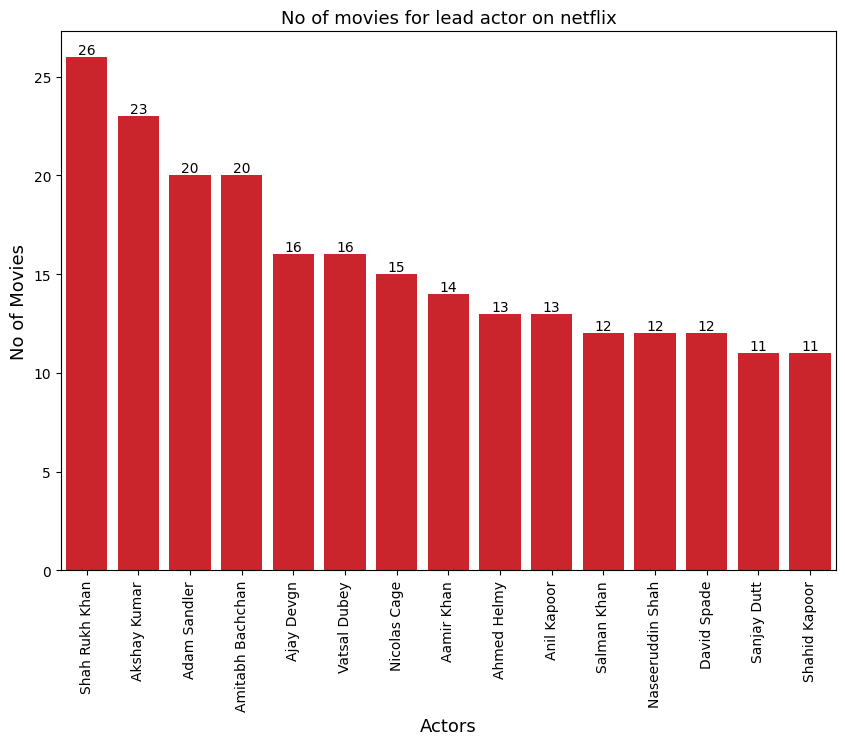

In [186]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = update_movie_lead_actor.index ,  y =update_movie_lead_actor.values , color="#E50914" , width=0.8)
plt.title("No of movies for lead actor on netflix" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xlabel("Actors" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("No of Movies" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 90)
p =plt.bar_label(container=ax.containers[0])


##### Insights
    - Shah rukh khan has more no of movies uploaded on netflix 
    - shahid kappor has lesser no of mpvies ipploaded on netflix 

In [163]:
TV_series_lead_actor = TV_series['lead_cast'].value_counts().head()
TV_series_lead_actor

lead_cast
David Attenborough    364
Name: count, dtype: int64

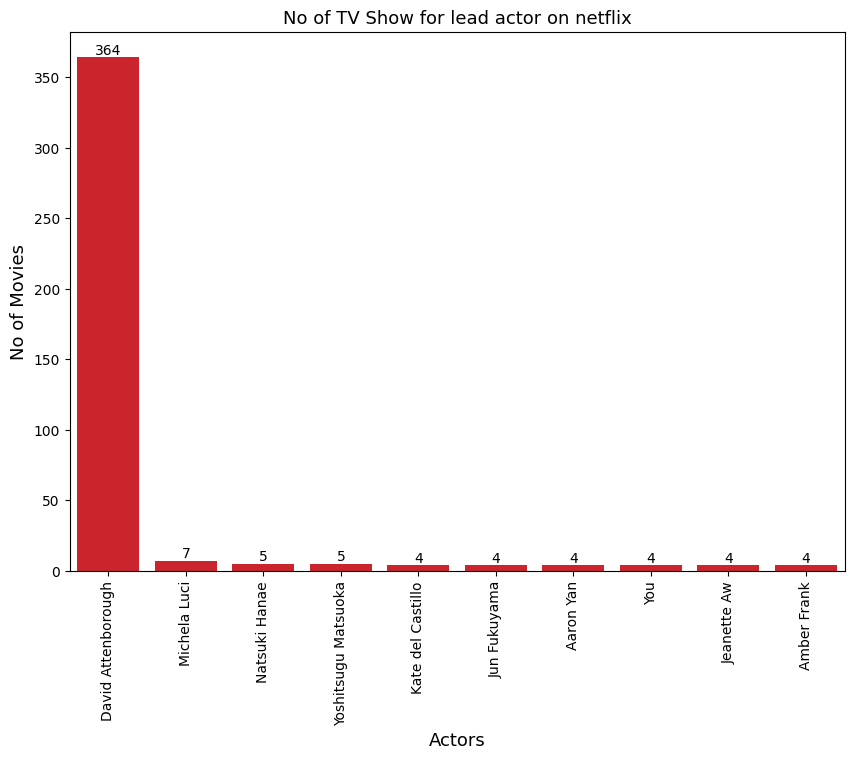

In [156]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x=TV_series_lead_actor.index , y= TV_series_lead_actor.values , color="#E50914" , width=0.8)
plt.title("No of TV Show for lead actor on netflix" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xlabel("Actors" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("No of Movies" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 90)
p =plt.bar_label(container=ax.containers[0])

###### Insights
    - David Attenborough is the most movies uploaded on netflix
    - Amber frank has lesser no of movies uploaded on netflix 

In [202]:
# Let's calculate averaege duration of movies and TV  Shows 
# You can clearly see, when i extracting duration column in movie datafram,  it's data type is object so we  have to make an int type
movies_copy = movies.copy()
movies_copy['new_duration'] = movies_copy['duration'].str.split(" ").str[0].astype(int)

In [204]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6128 non-null   object
 1   title         6128 non-null   object
 2   director      6128 non-null   object
 3   country       6128 non-null   object
 4   release_year  6128 non-null   int64 
 5   rating        6128 non-null   object
 6   duration      6128 non-null   object
 7   month         6128 non-null   object
 8   year          6128 non-null   int32 
 9   date          6128 non-null   int32 
 10  lists_show    6128 non-null   object
 11  lead_cast     6128 non-null   object
 12  new_duration  6128 non-null   int64 
dtypes: int32(2), int64(2), object(9)
memory usage: 622.4+ KB


In [206]:
movies = movies_copy

In [208]:
movies.drop('duration' , axis=1 , inplace=True)

In [215]:
cls = movies_copy.columns
del movies_copy

In [235]:
movies_duration = movies.groupby('lists_show')['new_duration'].mean().round().sort_values(ascending=False)

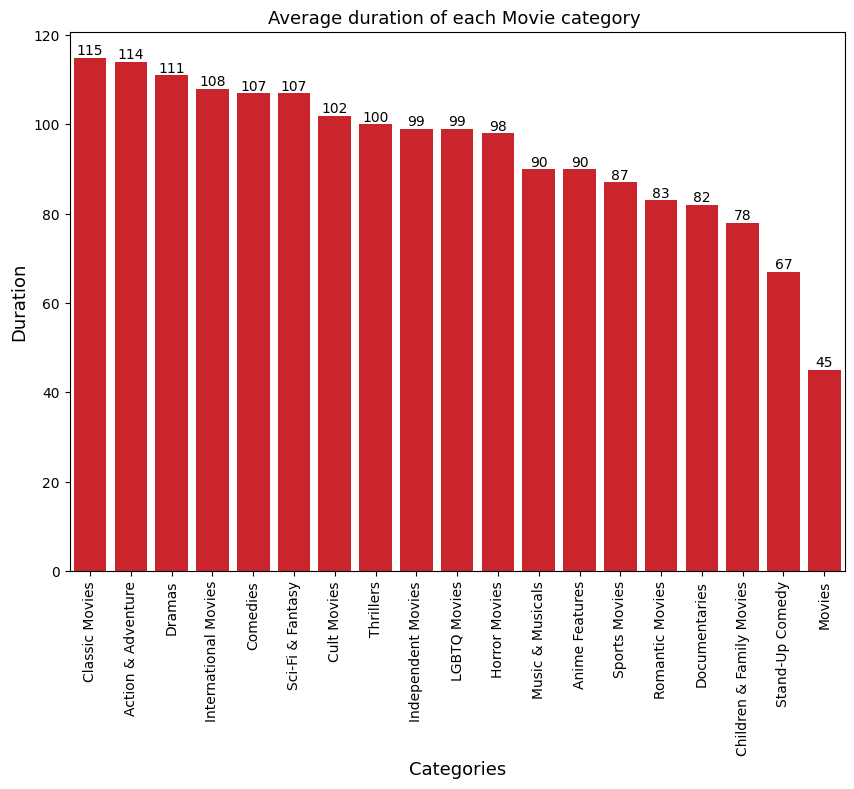

In [254]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = movies_duration.index , y = movies_duration.values , color= "#E50914" , width=0.8)
plt.title("Average duration of each Movie category " , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xlabel("Categories" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Duration" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 90)
p =plt.bar_label(container=ax.containers[0])

##### Insights
    - Classic and cultural Movies has more season than other
    - Movies  has least season 

In [247]:
# Let's calculate averaege duration of movies and TV  Shows 
# You can clearly see, when i extracting duration column in movie datafram,  it's data type is object so we  have to make an int type

TV_series['new_duration'] = TV_series['duration'].str.split(" ").str[0].astype(int)
TV_series.info()
TV_series.drop('duration' , axis=1)

C:\Users\ayush\AppData\Local\Temp\ipykernel_17124\3482365231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_series['new_duration'] = TV_series['duration'].str.split(" ").str[0].astype(int)


<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 1 to 8803
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          2676 non-null   object
 1   title         2676 non-null   object
 2   director      2676 non-null   object
 3   country       2676 non-null   object
 4   release_year  2676 non-null   int64 
 5   rating        2676 non-null   object
 6   duration      2676 non-null   object
 7   month         2676 non-null   object
 8   year          2676 non-null   int32 
 9   date          2676 non-null   int32 
 10  lists_show    2676 non-null   object
 11  lead_cast     2676 non-null   object
 12  new_duration  2676 non-null   int64 
dtypes: int32(2), int64(2), object(9)
memory usage: 271.8+ KB


,type,title,director,country,release_year,rating,month,year,date,lists_show,lead_cast,new_duration
1,TV Show,Blood & Water,Rajiv Chilaka,South Africa,2021,TV-MA,September,2021,24,International TV Shows,Ama Qamata,2
2,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,September,2021,24,Crime TV Shows,Sami Bouajila,1
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,United States,2021,TV-MA,September,2021,24,Docuseries,David Attenborough,1
4,TV Show,Kota Factory,Rajiv Chilaka,India,2021,TV-MA,September,2021,24,International TV Shows,Mayur More,2
5,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,September,2021,24,TV Dramas,Kate Siegel,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,Rajiv Chilaka,"Japan, Canada",2015,TV-Y7,May,2018,1,Anime Series,Mike Liscio,2
8796,TV Show,Yunus Emre,Rajiv Chilaka,Turkey,2016,TV-PG,January,2017,17,International TV Shows,Gökhan Atalay,2
8797,TV Show,Zak Storm,Rajiv Chilaka,"United States, France, South Korea, Indonesia",2016,TV-Y7,September,2018,13,Kids' TV,Michael Johnston,3
8800,TV Show,Zindagi Gulzar Hai,Rajiv Chilaka,Pakistan,2012,TV-PG,December,2016,15,International TV Shows,Sanam Saeed,1


In [252]:
Tv_series_Duartion = TV_series.groupby('lists_show')['new_duration'].mean().round().sort_values(ascending=False)

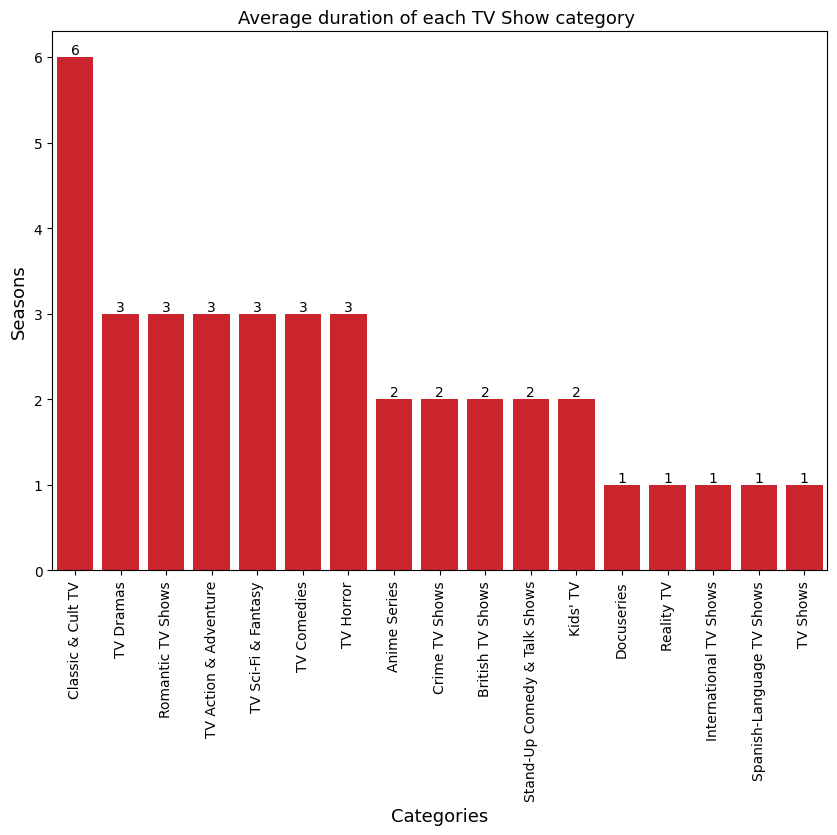

In [253]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = Tv_series_Duartion.index , y = Tv_series_Duartion.values , color= "#E50914" , width=0.8)
plt.title("Average duration of each TV Show category " , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xlabel("Categories" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.ylabel("Seasons" , fontdict={"color":"black" , "fontweight": "light" , "size" : 13} , loc='center')
plt.xticks(rotation = 90)
p =plt.bar_label(container=ax.containers[0])

##### Insights
    - Classic and cultural series has more season than other
    - TV shows has least season 